# DESCRIPTIVE AND INFERENTIAL STATISTICS

## Effects of temperature and pH on bacterial growth

### Julian Dietrich 


## Introduction

In this study, the effects of incubation pH and temperature on the growth of a bacterium with potential use in biotechnology are evaluated. Both enzyme production and the production of industrially interesting metabolites rely on the bacterium's ability to grow in substrates and develop sufficient active biomass.

Temperature and pH are identified as significant environmental factors that influence bacterial growth. The pH of the environment has implications for the stability and activity of enzymes and other cellular components. Bacteria typically have an optimal pH range within which they can thrive and function effectively. Deviating from this range, either towards acidic or basic conditions, can cause denaturation of enzymes and disruption of cellular structure, resulting in hindered or inhibited growth.

Likewise, optimal growth temperature varies across bacterial species. Temperatures below or above the optimal range can lead to decreased enzyme activity and potential denaturation, thus slowing down or inhibiting bacterial growth. Furthermore, temperature affects the fluidity of cellular membranes, which in turn affects the cell's functional capabilities. Consequently, both pH and temperature can impact essential cellular processes necessary for bacterial growth, including enzyme activity and nutrient availability, by modifying the stability and activity of cellular components.


The data used in this manuscript was partially obtained from my thesis to attain my Bachelor's degree in Biological Sciences from the National University of the South. However, it is important to note that the dataset utilized in this study is not identical to the data presented in the thesis, ensuring there is no possibility of copyright infringement. Furthermore, in order to enhance the robustness of the data analysis, additional pseudo-random data was generated and included in the dataset. The random.gauss() function from the random module in Python was employed to create this additional data.


## File reading

In [1]:
#Library

import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", message="kurtosistest only valid for n>=20")

In [2]:
#Upload data

df= pd.read_excel("BacteriaFinal.xlsx")
df

,T,pH,logCFU/ml
0,37,4.5,7.630068
1,37,4.5,7.595936
2,37,4.5,7.530059
3,37,4.5,7.603000
4,37,4.5,7.304967
...,...,...,...
67,45,8.5,8.885072
68,45,8.5,9.173172
69,45,8.5,8.933158
70,45,8.5,8.737989


In [3]:
#df shape

df.shape

(72, 3)

## Columns analysis

In [4]:
#Columns

df.columns

Index(['T', 'pH', 'logCFU/ml'], dtype='object')

This dataset has 3 columns: T, pH and logCFU/ml.

In [5]:
#Data types
df.dtypes

T              int64
pH           float64
logCFU/ml    float64
dtype: object

In [6]:
#Unique values
df.nunique()


T             2
pH            3
logCFU/ml    72
dtype: int64

In [7]:
#T° and pH conditions
print(df["T"].unique())
print(df["pH"].unique())

[37 45]
[4.5 7.  8.5]


#### Temperature
Corresponds to incubation temperature conditions. Two conditions were evaluated in these 
experiments, 37°C and 45°C.


(array([0, 1]), [Text(0, 0, '37'), Text(1, 0, '45')])

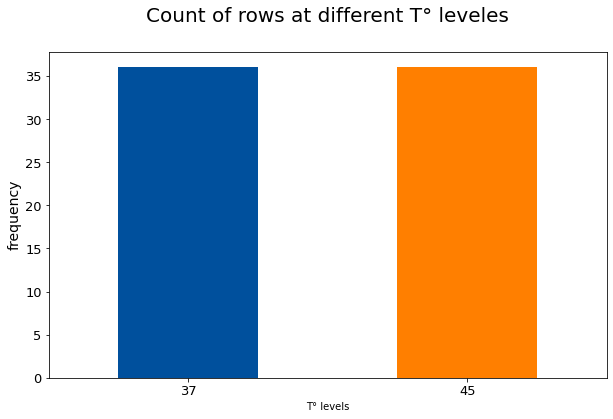

In [8]:
ax = df['T'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color=["#00509D", "#FF7F00"])
ax.set_title('Count of rows at different T° leveles', size=20, pad=30)
ax.set_ylabel('frequency', fontsize=14)
ax.set_xlabel("T° levels")
plt.xticks(rotation=0)


The two levels of the factor temperature are balanced, both with 36 data points.

### pH

Corresponds to the pH of the medium. In this case, three conditions were evaluated in these 
experiments, an incubation pH of 4.5, 7 and 8.5. 

(array([0, 1, 2]), [Text(0, 0, '4.5'), Text(1, 0, '7.0'), Text(2, 0, '8.5')])

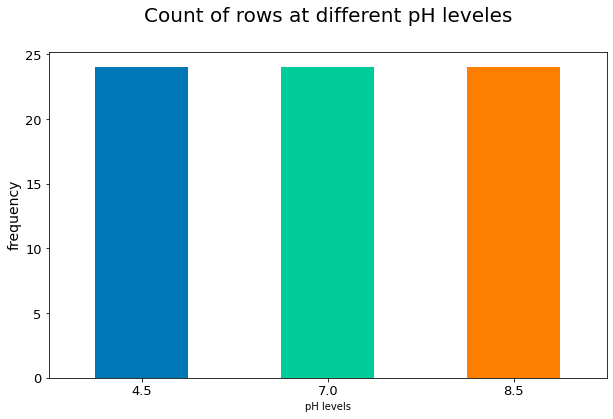

In [9]:
ax = df['pH'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color=["#0077B6", "#00CC99","#FF7F00"])
ax.set_title('Count of rows at different pH leveles', size=20, pad=30)
ax.set_ylabel('frequency', fontsize=14)
ax.set_xlabel("pH levels")
plt.xticks(rotation=0)

The three levels of the factor pH are balanced, each with 24 data points.

### logCFU/ml
A forming unit colony (CFU)is a unit of measurement used in microbiology to quantify the number of viable bacterial cells in a sample. The term "forming unit" refers to the number of colonies that form on a solid culture medium after incubation, and it is an indirect measure of the number  of bacterial cells present in the sample. 
The logarithmic transformation of FU colony counts is  used in microbiology to normalize the data, improve the interpretability of the results, and allow for more accurate statistical analysis.
logCFU/ml is the response variable I measured after cultivating the bacteria in the different  conditions of pH and temperature. 


In [10]:
df["logCFU/ml"].describe()

count    72.000000
mean      8.386948
std       0.561551
min       7.304967
25%       7.992211
50%       8.356547
75%       8.849946
max       9.727322
Name: logCFU/ml, dtype: float64

Text(0, 0.5, 'logCFU/ml')

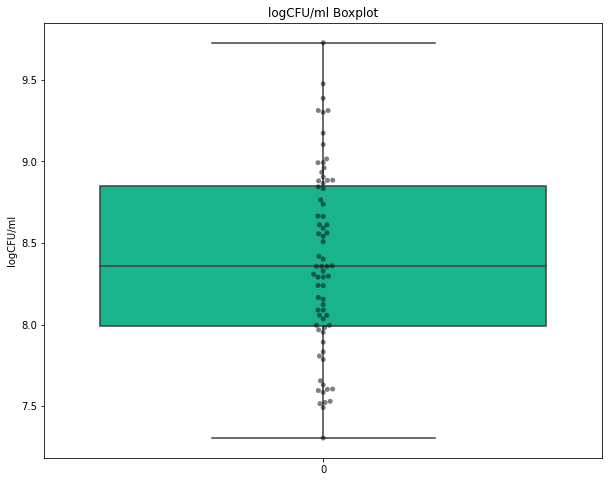

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('logCFU/ml Boxplot')
sns.boxplot(data=df["logCFU/ml"],color="#00CC99")
sns.swarmplot(data=df["logCFU/ml"], color='black',
              alpha = 0.5, )
ax.set_ylabel("logCFU/ml")


As it can be observed in the previous boxplot, this response variable seems to have a normal distribution.

## Statistical analysis

It will be investigated whether different buffers and temperatures significantly affect bacterial growth. Using the logCFU/mL data for the bacteria of interest across different treatments, I performed a bidirectional ANOVA analysis to evaluate the interrelation of the two independent variables, temperature and buffer, on the dependent (or response) variable (logCFU/mL). The temperature factor has two levels, 35°C and 45°C, and the pH factor has three levels: 4.5, 7, and 8.5.

As it can be observed in "Columns Analysis", the design is balanced, the number of observations per level are equal. This aspect is important because balanced designs help ensure the validity of the statistical inferences that are made.
Having a balanced design helps to ensure that the results of the ANOVA are not biased by unequal sample sizes or unequal variability among the groups.


Bidirectional ANOVA hypotheses:

• Ho (Temperature factor): there are no differences in the means of logCFU/ml between 
the two temperature levels.

• Ho (pH factor): there are no differences in the means of logCFU/ml between the 
different pH values.

• Ho (pH x temperature factor): there is no interaction, the effects of temperature are the 
same at each of the pH levels, and vice versa; therefore, both factors add their effects 
(are additive).


### Graphic and descriptive analysis


<AxesSubplot:title={'center':'log CFU/ml at differents T° levels'}, xlabel='T', ylabel='logCFU/ml'>

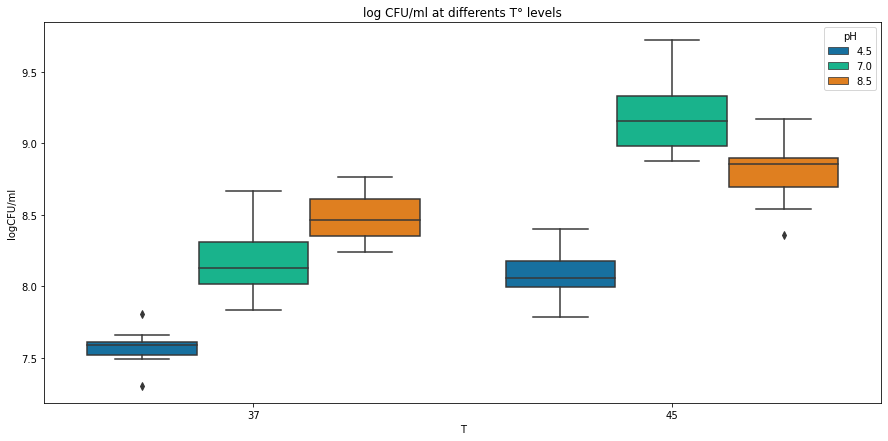

In [12]:
#Box-plot

fig, ax = plt.subplots(figsize=(15, 7))
ax.set_title('log CFU/ml at differents T° levels')
sns.boxplot(x="T", y="logCFU/ml",hue="pH", data=df, palette=["#0077B6", "#00CC99", "#FF7F00"])

#plt.savefig("boxplot.png")


In [13]:
print('Mean results and standard deviation by temperature and pH')
df.groupby(['pH', 'T'])['logCFU/ml'].agg(['mean', 'std'])

Mean results and standard deviation by temperature and pH


mean       std
pH  T                     
4.5 37  7.570569  0.118198
    45  8.088060  0.166969
7.0 37  8.187911  0.261646
    45  9.188079  0.267978
8.5 37  8.477502  0.165381
    45  8.809568  0.232843

Based on the graphical representation and mean calculations, it can be inferred that there is a significant difference in bacterial growth depending on both the pH level of the medium and the incubation temperature. At an incubation temperature of 37°C, increasing the pH results in an increase in bacterial growth. However, at a higher temperature of 45°C, bacterial growth is highest at a neutral pH (pH=7), and declines in more alkaline conditions (pH=8.5).

#### Outliers values
Two extreme values can be observed in the box-plot graph. At 37°C in a pH of 4.5 there is an 
extreme low value of 7,291554 logCFU/ml and at 45°C in a pH of 8.5 there is also an extreme 
low value of 8,356547324 logCFU/ml.
In this case, I have decided not to remove the outliers as I believe they are representative of the 
natural variation present in the population I am studying. These outlier values are not so 
extreme that they can be considered errors in measurement or the experimental process


# Normal distribution analysis

In [45]:

from scipy import stats

# Filter the dataframe by combinations of pH and temperature.
def filter_dataframe(df, pH, T):
    filtered_df = df[(df['pH'] == pH) & (df['T'] == T)]
    return filtered_df

# Generate a Q-Q plot to check for normal distribution.
def plot_qq_plot(data):
    plt.figure(figsize=(8, 6))
    stats.probplot(data, dist="norm", plot=plt)
    plt.title('Q-Q Plot')
    plt.show()
# Filter and plot for all combinations of pH and temperature.
def filter_and_plot(df):
    pH_values = df['pH'].unique()
    T_values = df['T'].unique()

    for pH in pH_values:
        for T in T_values:
            filtered_data = filter_dataframe(df, pH, T)
            data = filtered_data['logCFU/ml']
            # Verify if the dataset follows a normal distribution.
            normal_test = stats.normaltest(data)
            print(f"pH: {pH}, T: {T}")
            print(f"Normality Test p-value: {normal_test.pvalue}")
            sns.kdeplot(data) 
            plt.xlabel('logCFU/ml')
            plt.ylabel('Density')
            plt.title("Density plot")
            
            # Q-Q plot
            plot_qq_plot(data)

pH: 4.5, T: 37
Normality Test p-value: 0.1716148627248397


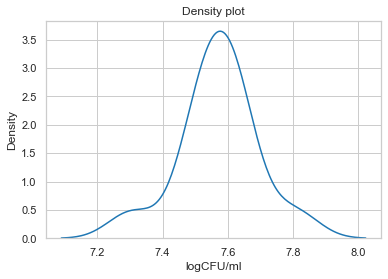

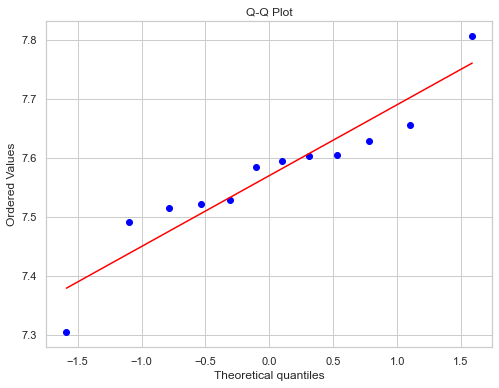

pH: 4.5, T: 45
Normality Test p-value: 0.8349270461594511


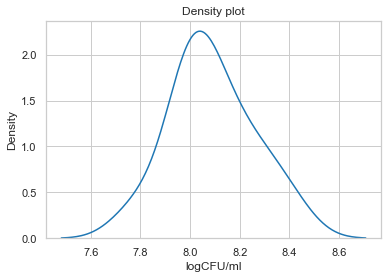

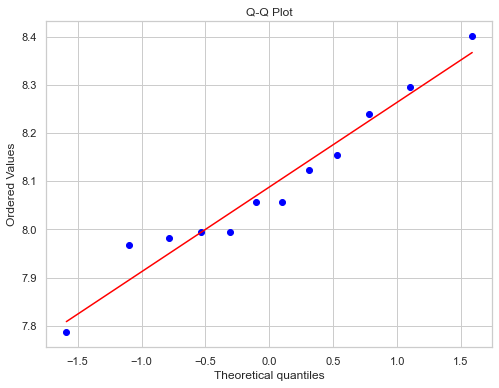

pH: 7.0, T: 37
Normality Test p-value: 0.6457768760113738


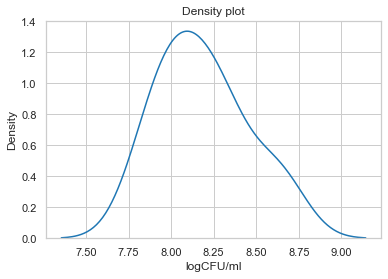

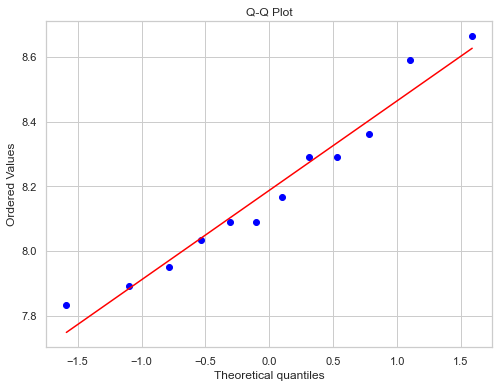

pH: 7.0, T: 45
Normality Test p-value: 0.5823904455041234


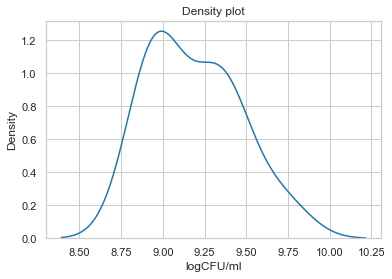

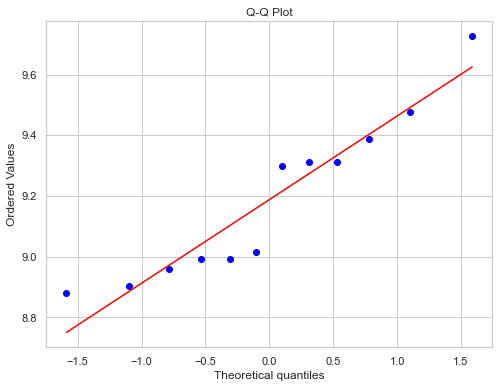

pH: 8.5, T: 37
Normality Test p-value: 0.5066562210689163


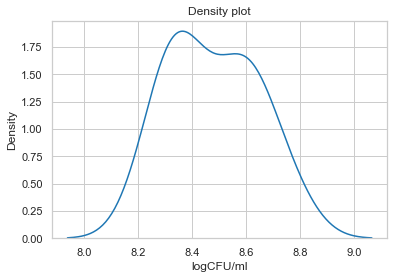

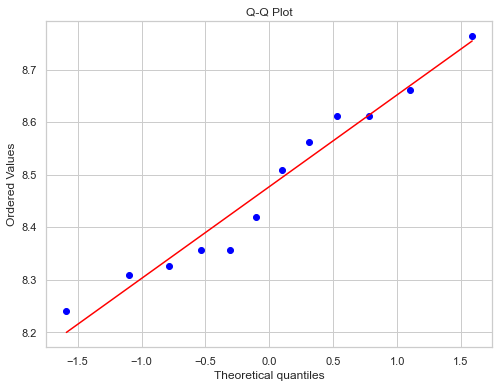

pH: 8.5, T: 45
Normality Test p-value: 0.7311431759120277


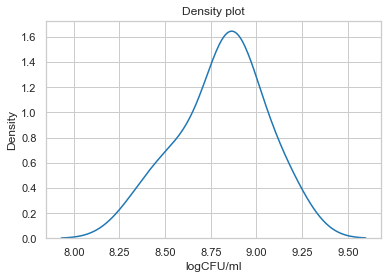

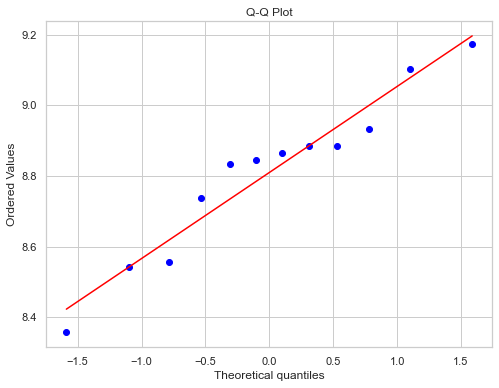

In [46]:
filter_and_plot(df)

In none of the groups does the normality test yield a p-value <0.05, indicating that there is not  enough evidence to reject the null hypothesis of normality.
This function tests the null hypothesis that a sample comes from a normal distribution. It is based on D’Agostino and Pearson’s (1971,1973), test that combines skew and kurtosis to produce an omnibus test of normality.



# Levene Test

In [21]:
from scipy.stats import levene
import numpy as np

def filter_and_levene(df):
    pH_values = df['pH'].unique()
    T_values = df['T'].unique()
    levene_test = []

    for pH in pH_values:
        for T in T_values:
            filtered_data = filter_dataframe(df, pH, T)
            levene_test.append(filtered_data['logCFU/ml'].tolist())
    #Levene test
    stat, p = levene(*levene_test, center="median")

    # Print results
    print('Test statistic:', stat)
    print('p value:', p)

filter_and_levene(df)

Test statistic: 2.371351626800554
p value: 0.04855098670067852


Under certain conditions, some methods such as ANOVA are robust, meaning they work well even when assumptions are not met, if the sample size is large and the violation of assumptions is not very drastic, that is, if the probability value associated with the test statistic is not much  smaller than the established level of significance (α) (Pérez Pelea, 2018). In the book Handbook of Biological Statistics (McDonald, 2014), it is considered highly recommended to use balanced designs (same number of observations per group). ANOVA is quite robust to the lack of homoscedasticity if the design is balanced, treatment effects contrasts can be estimated accurately even if homogeneity of variance is not perfectly met(Amat Rodrigo, 2021).
Although the p-value in the Levene test is lower than the chosen significance level (0.05), it is not much smaller (p-value: 0.04855). Considering the design is balanced and the discussion in the previous paragraph, the ANOVA analysis will be done anyway.

# ANOVA ANALISIS

In [17]:
import pingouin as pg

# Two-way ANOVA
# ==============================================================================
pg.anova(
    data     = df,
    dv       = 'logCFU/ml',
    between  = ['pH', 'T'],
    detailed = True
).round(9)

,Source,SS,DF,MS,F,p-unc,np2
0,pH,11.218104,2,5.609052,127.629786,0.000000,0.794559
1,T,6.842967,1,6.842967,155.706596,0.000000,0.702309
2,pH * T,1.427441,2,0.713721,16.240177,0.000002,0.329816
3,Residual,2.900557,66,0.043948,NaN,NaN,NaN


c:\Users\Julian\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


# Final conclusion

The analysis of variance indicates a significant influence on the logCFU/ml of the bacteria of interest by both factors, temperature and pH, with large effect sizes of η2. Moreover, a significant interaction between both factors was detected, in all cases with a probability of error less than 1% (p < 0.01). The significant interaction implies that the different pH values do not produce the same effect within each temperature level (and vice versa). 
The highest growth was observed at a pH value of 7 and an incubation temperature of 45°C.
An interaction plot was generated to illustrate the differences observed under the different growth conditions.

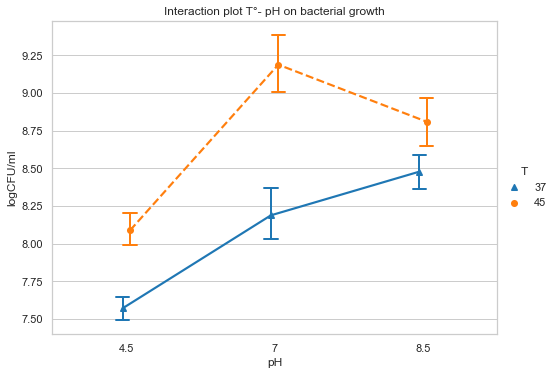

In [18]:
#Interaction plot

sns.set_style("whitegrid")

sns.set_context("notebook")
plot = sns.catplot(data=df, x="pH", y="logCFU/ml", hue="T", dodge=True,
                   order=[4.5, 7, 8.5], errwidth=2, capsize=0.09,
                   markers=["^", "o"], linestyles=["-", "--"], kind="point",
                   aspect=10/7, scale=0.8, ci=99
                 ).set(title="Interaction plot T°- pH on bacterial growth")

plot.fig.subplots_adjust(top=1)
sns.despine(left=False, bottom=False, top= False, right=False)


## Bibliography 

Amat Rodrigo, J. (2021, December). Analysis of variance (ANOVA) with Python. Data Science. Retrieved February 26, 2023, from https://www.cienciadedatos.net/documentos/pystats09-analisis-de-varianza-anova-python.html

D’Agostino, R. and Pearson, E. S. (1973), “Tests for departure from normality”, Biometrika, 60, 613-622

D’Agostino, R. B. (1971), “An omnibus test of normality for moderate and large sample size”, Biometrika, 58, 341-348

Pérez Pelea, L. (2018). How do we proceed to violations of parametric methods assumptions? or how to work with non-normal biological variables? Revista del Jardín Botánico Nacional, 39, 1-12

McDonald, J.H. (2014). Handbook of Biological Statistics (3rd ed.). Sparky House Publishing, 
Baltimore, Maryland, from http://www.biostathandbook.com/onewayanova.htm